<a id='top'></a>

# Homework 5: Confidence intervals and other things
***

**Name**: Luna McBride

***

This assignment is due on Moodle by **5 PM on Thursday July 11**. Your solutions to theoretical questions should be done in Markdown/MathJax directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your instructors and classmates, but **you must write all code and solutions on your own**.  

**NOTES**: 

- Do **NOT** load or use any Python packages that are not available in Anaconda 3.6. 
- Some problems with code may be autograded.  If we provide a function API **do not** change it.  If we do not provide a function API then you're free to structure your code however you like. 
- Because you can technically evaluate notebook cells is a non-linear order, it's a good idea to do Cell $\rightarrow$ Run All as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- Submit only this Jupyter notebook to Moodle.  Do not compress it using tar, rar, zip, etc. 
- This should go without saying, but... For any question that asks you to calculate something, you **must show all work to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit.

---
**Shortcuts:**  [Problem 1](#p1) | [Problem 2](#p2) 

---

In [154]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
%matplotlib inline

---
<a id='p1'></a>
[Back to top](#top)


### [55 points] Problem 1 - Exploring Confidence Intervals 

The [Gumbel](https://en.wikipedia.org/wiki/Gumbel_distribution) distribution is one of several distributions frequently used to model environmental extremes (for example, extreme temperatures and sea levels).  It is also fairly asymmetric, and thus interesting for investigating confidence intervals.  It is implemented in scipy.stats as [gumbel_r](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gumbel_r.html), where the appendix "\_r" denotes the right-skewed version of the Gumbel distribution (as opposed to the left-skewed).

**Part A**: Complete the following code cell to plot a histogram of 100 realizations from the Gumbel distribution with parameters $\mu=8$ and $\beta=2$.  Be sure to leave this cell executed before turning in your assignment! Make your histogram grey with gold edges.

The mean is: 9.377203695144233


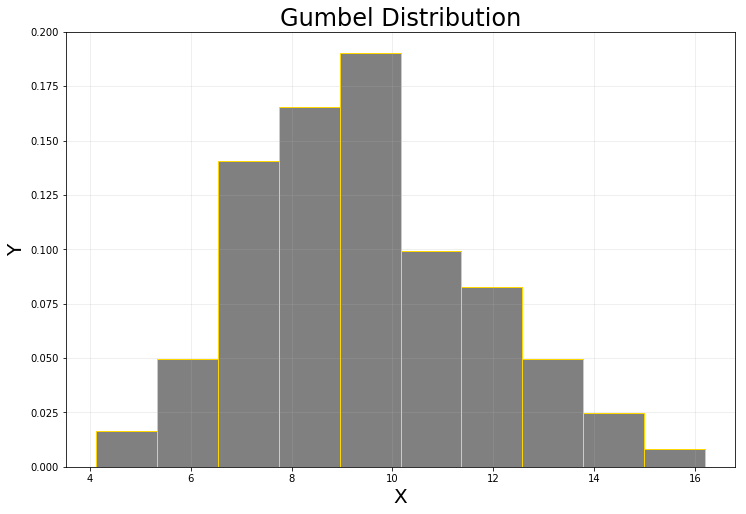

In [155]:
#Parameters given in the equation
mu = 8
beta = 2
n_sample = 100

fig,axes=plt.subplots(figsize=(12,8)) #Basic setup of the histogram
result=stats.gumbel_r.rvs(loc=mu,scale=beta,size=n_sample) #Building the gumbel based on the stats.gumbel_r reference doc
    
plt.hist(result,density=True,facecolor="grey", edgecolor="gold") #Plot of the histogram following gumbel_r

#Prettifiers and labels for the histogram
axes.set_title("Gumbel Distribution", fontsize=24)
axes.set_xlabel("X", fontsize=20)
axes.set_ylabel("Y", fontsize=20)
axes.grid(alpha=0.25)

#Empiracal mean for part B
print("The mean is: {}".format(result.mean()))

**Part B:** Look up the analytical mean and variance of the Gumbel distribution with parameters $\mu=8$ and $\beta=2$ and calculate them here by hand.  Note that the Euler–Mascheroni constant can be accessed via `np.euler_gamma`. 

Use the empirical mean from your sample in **Part A**, and the true variance of the Gumbel distribution to compute by hand a 95% confidence interval for the mean.

source: http://mathworld.wolfram.com/GumbelDistribution.html

$\mu = \alpha - \gamma * \beta$

$\gamma$=0.5772

8= $\alpha$ - 0.5772(2)

8= $\alpha$ - 1.1544

$\alpha$= 9.1544

$\mu=9.1544-0.5772\beta$

-------------------------------------------------------------

$\sigma^2 = \frac{1}{6} * \pi^2 * \beta^2$

$\sigma^2 = \frac{1}{6} * \pi^2 * 4$

$\sigma^2 = \frac{2}{3} * \pi^2$

$\sigma^2 = 6.5797$

$\sigma = 2.5651$

-------------------------------------------------------------

$\bar{x} \pm z_\frac{\alpha}{2} * \frac{\sigma}{\sqrt{n}}$

Empirical mean differed depending on the run, but it came to about 9 overall (The current run has it at 9.0253, so I will use that)

The number of samples was 100, so I will use that for n.

From in class exercises, I remember $z_\frac{\alpha}{2}$ for 95% confidence is 1.96'

9.0253 $\pm$ 1.96 * $\frac{2.5651}{\sqrt{100}}$

9.0253 $\pm$ 1.96 * $\frac{2.5651}{10}$

9.0253 $\pm$ 1.96 * 0.2565

9.0253 $\pm$ 0.5028

[8.5225,9.5281]

In [156]:
print(np.euler_gamma)
print(np.euler_gamma*2)

0.5772156649015329
1.1544313298030657


**Part C:  A theoretical interlude.** When Stella O'Flaherty (the famous octopus) ran her solution code for **Part B**, she obtained a 95% confidence interval of $[8.81, 9.82]$ for the mean of the $Gum(\mu=8, \beta=2)$ distribution. For each of the following, explain why or why not the situation described is correct, given the technical definition of a 95% confidence interval we went over in class.

**(i)** If you had no other evidence regarding true mean of the $Gum(\mu=8, \beta=2)$ distribution, you could say there is a 95% chance that its true mean falls between 8.81 and 9.82.

**(ii)** If a class of 100 students all construct 95% confidence intervals for the mean of the $Gum(\mu=8, \beta=2)$ distribution, then we expect about 95 of their CIs to contain the true mean, and about 5 of them to miss the true mean.

**(iii)** There is a 95% probability that any given random variable sampled from $Gum(\mu=8, \beta=2)$ will be between 8.81 and 9.82.

(i) No, I would say it is fair to assume there is a 95% chance that this interval hit the true mean. It depends on the empirical mean she got from part A, but as a confidence interval of 95% means that 95% of intervals will contain the true mean somewhere within them, so there is a 95% chance hers has the mean. However, the mean is just a number and the interval is more talking about hitting or containing the mean rather than the mean falling into the interval.

(ii) Of course it depends on the means obtained from part A (or similar), but this is a fair assumption to make. If we go back to the notebook we got when first learning this, there was an example that did the 95% interval 20 times with a graph of the intervals and true mean with one of the twenty not having the true mean, so I feel it is safe to say this scales and, as such, fits the definition.

(iii) This would be incorrect. The confidence interval speaks about whether the true mean is within the a set interval. Though a mean shows an approximate middle point, the nature of means with regard to outliers really makes it so we are unable to tell how many random points is within the interval (if any).

**Part D:** In this part you'll write a function to investigate the _coverage properties_ of a confidence interval for the mean of the Gumbel distribution. Complete the following function to randomly sample $m=500$ sample means with sample size $n=100$ for the Gumbel distribution with parameters $\mu=8$ and $\beta=2$.  For each random sample, compute the 66% confidence interval for the mean. Note that you actually know that the variance for the true population distribution is, $\sigma^2$.  Your function should do two things: 

1. Report the proportion of confidence intervals that successfully cover the true mean of the distribution 
2. Make a plot of 50 randomly selected confidence intervals. Overlay the intervals on the line $y=\textrm{True mean}$ (from **Part B**). Color confidence intervals black if they cover the true mean, and red if they don't.  

Be sure to leave this cell executed before turning in your assignment!

proportion covering mean: 329.000


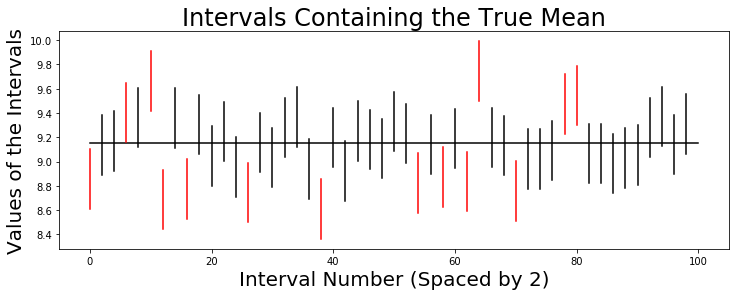

In [157]:
def confidence_intervals(m=500, n=100):
    #Given variables as well as one known from part B
    mu = 8
    beta = 2
    trueMean=9.1544
    
    confidence=stats.norm.ppf(0.83) #Confidence interval for z alpha/2
    sigmaOverN=2.5651/(n**0.5) #The sigma over n for the interval given the previously calculated sigma
    plusMinus=confidence*sigmaOverN #The part of the interval equation that makes the interval. now we just need xbar
    
    proportion_CIs_covering_mean = 0 #counter for the amount containing the true mean
    lines=0 #A spacing counter so all the graphed intervals do not layer on top of eachother
    
    numbers=np.array(range(1,m+1)) #An array of numbers 1-500 for randomization purposes
    choice=np.random.choice(numbers,size=m,replace=False) #The random list of numbers to randomize which 50 intervals are drawn
    
    fig,axes=plt.subplots(figsize=(12,4)) #initiating the plotting library
    
    #Basic labels and prettifiers
    axes.set_title("Intervals Containing the True Mean", fontsize=24)
    axes.set_xlabel("Interval Number (Spaced by 2)", fontsize=20)
    axes.set_ylabel("Values of the Intervals", fontsize=20)
    
    x=np.linspace(0,100,100) #x so it can only be the true mean
    y=np.linspace(trueMean,trueMean,100) #y values so it can make a straight line
    axes.plot(x,y,'-k') #plots the point of the true mean
    
    #A for loop to calculate all the means, intervals, and draw the interval if it is selected to be drawn
    for i in range(0,m):
        redBlack=0 #Variable to decide if the intervals drawn should be red or black (red is default)
        gumbel=stats.gumbel_r.rvs(loc=mu,scale=beta,size=n) #draws the gumbel distribution
        mean=gumbel.mean() #gets a mean for the gumbel distribution
        upper=mean+plusMinus #takes the upper end of the interval given the mean
        lower=mean-plusMinus #takes the lower end given the mean
        if lower<=trueMean<=upper: #checks if the interval contains the true mean
            proportion_CIs_covering_mean+=1 #adds to the number of those intervals containing the mean
            redBlack=1 #sets the interval to be black if drawn
            
        if choice[i]%10==3: #Checks if a random number chosen can be modulated by 3 (an arbitrary way to randomly choose 50)
            y=np.linspace(lower,upper,100) #y values to draw the interval
            x=np.linspace(lines,lines,100) #x values to place it in comparison to the line
            if redBlack==1: #Checks if the interval touches the true mean
                axes.plot(x,y,'-k') #Touches the true mean, so is black
            else:
                axes.plot(x,y,'-r') #Does not contain the true mean, so is red
            lines+=2 #Spaces the lines
        
    print("proportion covering mean: {:.3f}".format(proportion_CIs_covering_mean))
    
    
confidence_intervals()

**Part E:** Does the proportion of confidence intervals that cover the true mean of the distribution agree with the theory described in class?  Justify your conclusion. 

This does agree fairly well with the definition discussed in class. It may have some variation, but it is close to the 66% likelihood. Variation is to be expected from doing the test over and over, with more variation with lower number of trials. However, approximately $\frac{2}{3}$ of the intervals contain the true mean with the 66% confidence interval, so it follows the theory described in class

---

<a id='p2'></a>
[Back to top](#top)

### [45 points] Problem 2 - Freethrows
***

Keep your skills sharp by answering these straightforward questions.

**Part A**: <font color='green'>You are driving through the paint toward the basket when Steph Curry fouls you. You step to the line to sink this freethrow shot, which is delivered in the form of a CSCI3022 problem:</font>

You have a shuffled deck of cards. It includes the usual 52 cards AND three special additional Octopus cards. You flip over the cards one by one, without replacing them in the deck. You count how many cards you'll have to flip until you flip over the second Octopus.  You repeat this many times. Simulate this process. Plot a histogram with binsize=1 of the outcomes, in lightgrey with white outline. Compute the mean, median, and mode for this dataset, indicate them on the plot too, using linstyles of green dashed, pink dotted, and black solid, respectively. Look up how to do a legend in MatPlotLib, and label your histogram, mean, median.
***

The mean is 27.9529
The median is 28.0
The mode is 27


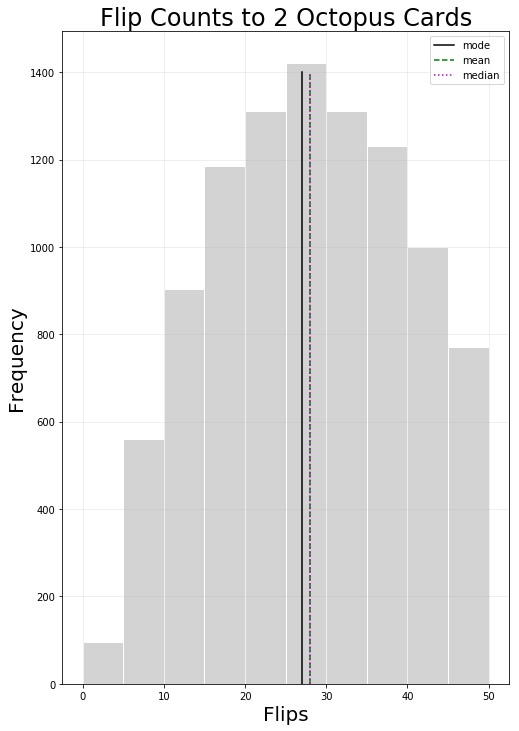

In [158]:
size=10000 #iterations of the experiment
cards=np.zeros(55) #initializing the array so I can fill it without typing every number

#Assigns the values to the cards
for i in range(0,55):
    cards[i]=i+1
    if i>=52:
        cards[i]+=100 #Add 100 as a signifier of the octopus card

#Determines the number of flips until two octopus cards
def flips():
    count=0 #total flipped
    octocount=0 #total octopus cards
    flip=np.random.choice(cards,size=55,replace=False) #shuffling the deck
    for i in range(0,55):
        count+=1 #flip a card, add to how many has been flipped
        if flip[i]>100: #checks for the card marker I put for octopus cards
            octocount+=1 #Increments our octopus card count when we have found one
            if octocount==2: 
                break #ends the for loop if we have two octopus cards drawn
    return count

#Gets the mean, median, and mode of our results
def stat(result,summ):
    mean=summ/size #quick mean calculation from the sum we took
    result.sort()
    
    if size%2==1:
        median=result[int((size/2)-0.5)] #Basic median calculation if sample size is odd
    else:
        e=size/2
        ep=e+1
        ea=result[int(e)]+result[int(ep)] 
        median=ea/2 #Median calculation when sample size is even, the average of the values at (n/2)+((n/2)+1)
        
    xsumm=0 #summator for number of occurances of a value
    value=0 #the value that has the most
    for i in range(0,55):
        esumm=np.sum(result==i) #checks number of entries with value i
        if esumm>xsumm:
            xsumm=esumm #saves the highest sum we know we have
            value=i #saves the value at the highest amount
    
    return mean,median,value
    
    
result=np.zeros(size) #an array to hold the results of each experiment
summ=0 #summator for values to calculate the mean
for i in range(0,size):
    result[i]=flips() #results of the test at trial i
    summ+=result[i] #summation for the results up until i
    
mean,median,mode=stat(result,summ)  #calculation of mean, median, and mode
    
fig,axes=plt.subplots(figsize=(8,12))
plt.hist(result,facecolor="lightgrey",bins=range(0,55,5),edgecolor="white") #Plot histogram

#loosely following https://scriptverse.academy/tutorials/python-matplotlib-plot-straight-line.html
#and https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.legend.html

x=np.linspace(mode,mode,100) #x so it can only be the mode
y=np.linspace(0,1400,100) #y values so it can make a line
mo, =axes.plot(x,y,'-k') #line at the mode to be drawn
mo.set_label("mode") #label the mode for the legend

x=np.linspace(mean,mean,100) #x so it can only be the mean
y=np.linspace(0,1400,100) #y values so it can make a line
me, =plt.plot(x,y,'--g') #line at the mean to be drawn
me.set_label("mean") #label the mean for the legend

x=np.linspace(median,median,100) #x so it can only be the median
y=np.linspace(0,1400,100) #y values so it can make a line
med, =plt.plot(x,y,':m') #line at the median to be drawn
med.set_label("median") #label the median for the legend

axes.legend() #draws the legend for the mean, median, and mode

#Print the mean, median, and mode so you can see the values along with the graph
print("The mean is {}".format(mean))
print("The median is {}".format(median))
print("The mode is {}".format(mode))

#Histogram basic labeling and prettifiers
axes.set_title("Flip Counts to 2 Octopus Cards", fontsize=24)
axes.set_xlabel("Flips", fontsize=20)
axes.set_ylabel("Frequency", fontsize=20)
axes.grid(alpha=0.25)

**Part B**: <font color='green'>You sink your first free throw and immediately get dap from your teammates, Oscar O'Flaherty and Octavia O'Flaherty. You prepare to take another shot, which—and you're not going to believe this—is another CSCI3022 problem:</font>

In general, which is wider: a 95% confidence interval or a 99% confidence interval? How would you explain this to your younger sibling, who is not a statistician?
***

A 99 percent confidence interval is wider than a 95 percent confidence interval. A confidence interval is the area under the normal curve that we will allow for to accept a value as fair to assume might contain the true mean. The larger the interval, the more distance to the edge we are going to accept as a good value for the hypothesis. A smaller interval has more of the edge not included from counting values, so it is a relatively narrower interval.

**Part C**: <font color='green'>The crowd is silent. Everything is slow motion. You're literally in the air, releasing what looks to be a perfect shot to tie the match. As you release the ball, a hand appears to block it. It is Kevin Durant. :( 

Luckily, his fingertips also brush against your arm. That's a foul, and everyone saw it. Back to the line. Back to CSCI3022:</font>

Let $X$ be a normally-distributed random variable. You draw from it and get these values, stored in the numpy array **durant**, below. Compute a 95% confidence interval for the _standard deviation_.
***

In [159]:
durant = np.array([3.7778,3.9459,3.8248,4.1111,4.0180,4.0898,4.0380,3.9273,3.9614,3.8387])

Range: 3.7778-4.1111

$\bar{X} \pm z_{\alpha/2} \frac{\sigma}{\sqrt{n}}$

There are 10 entries, so n=10

Upper Bound=$\bar{X} + z_{\alpha/2} \frac{\sigma}{\sqrt{n}}$

Upper Bound-$\bar{X}=z_{\alpha/2} \frac{\sigma}{\sqrt{n}}$

$\frac{ub-\bar{x}}{z_{\alpha/2}}=\frac{\sigma}{\sqrt{n}}$

$\sqrt{n} * \frac{ub-\bar{x}}{z_{\alpha/2}}=\sigma$

For lower bound: $\sqrt{n} * \frac{ub-\bar{x}}{-z_{\alpha/2}}=\sigma$

In [160]:
#Calculates sigma given the xbar, zalpha, n, which bound it is, and whether we should add/subtract depending on the bound
def sigma(xb,za,n,upperlower,plusminus):
    if plusminus=="p": #Checks if we are told to add
        num=upperlower-xb #numerator for that shown in the markdown above
        frac=num/za #The overall fraction before multiplying by the n
        sig=frac*(n**0.5) #Sigma calculated
        return sig
    else:
        num=upperlower-xb #The numerator of the fraction
        frac=num/-za #The overall fraction with the z alpha being negative as it is the lower bound
        sig=frac*(n**0.5) #The sigma of the lower bound
        return sig

n=len(durant) #n following the durant size
upper=durant.max() #The upper bound, being the highest value
lower=durant.min() #The lower bound, being the lowest value
difference=upper-lower #The distance between the two bounds, thus the total span of xbar
xbar=(difference/2)+lower #Xbar, as the value is what is between the two limits

zalph=stats.norm.ppf(0.975) #z alpha/2, following what we were told in class for the ppf

sig=sigma(xbar,zalph,n,upper,"p") #sigma for the upper bound
sigl=sigma(xbar,zalph,n,lower,"m") #sigma for the lower bound

#Print statement for sigma
print("Sigma={}".format(sig))
print("Here is sigma with the lower bound as a sanity check: {}".format(sigl))

Sigma=0.268879212181407
Here is sigma with the lower bound as a sanity check: 0.268879212181407


**Part D**: <font color='green'>"Draymond Green has it all, in spite of living in the Bay Area," you think to yourself. "But he doesn't have this shot..." You're all over him, and he's going to have to pass. You can see the irritation in his eyes. Then you realize that it's not irritation, and he's not being distracted by your superb defense. He's being distracted by this CSCI3022 problem:</font>

If you're doing quality control for the average strength of carbon fiber that will be used in airplane construction, and your alternative hypothesis is that the strength of the carbon is below tolerance, and therefore unsafe, would you rather have a low Type I error rate or a low Type II error rate? Explain.

***

I would rather have a low Type II error rate. The null hypothesis in this case is that the carbon strength is at safe levels, so not rejecting the null hypothesis when the situation is actually dangerous is not good. Type I may be a bit expensive, but it allows for additional testing of the carbon fiber and further safety checks, which is much better than lawsuits pertaining to possible neglegence on the part of the safety testers

**Part E**: <font color='green'>You are watching tape footage at halftime with your personal trainer, Stella O'Flaherty. You gotta focus up if you're going to match Klay Thompson's speed in the second half. You take a sip of Gatorade and Dr. O'Flaherty suggests that you do the following CSCI3022 problem:</font>

You measure 53 suckers from baby reef octopuses and find that they are, on average, 45.2 mm wide, with a standard devaition of 30.4mm. 

Then you measure 41 suckers from from baby dumbo octopuses and find that they are, on average, 52.8 mm wide, with a standard deviation of 22.8 mm. 

Is there statistical evidence at the 0.05 significance level that the true mean of baby dumbo octopus sucker width exceeds the true mean of baby reef octopus sucker width by more than 6 mm?  Use a test of your choice.

***

$H_0: \mu_1-\mu_2=6$

$H_1: \mu_1-\mu_2>6$



z=$\frac{\bar{x}-\bar{y}-c}{ \sqrt{\frac{\sigma_x^2}{m}+\frac{\sigma_y^2}{n}}}$

z=$\frac{(52.8-45.2)-6}{\sqrt{\frac{22.8^2}{41}+\frac{30.4^2}{53}}}$

z=$\frac{1.6}{\sqrt{12.6790+17.4370}}$

z=$\frac{1.6}{\sqrt{30.1160}}$

z=$\frac{1.6}{5.4878}$

z=0.2916

p=1-$\phi(0.2916)$

p=0.3853

0.3853>0.05; Therefore, fail to reject the null hypothesis

The true mean of the baby dumbo's suckers does not exceed the baby reef's by 6mm

In [161]:
z=stats.norm.cdf(0.2916)
p=1-z
print(p)

0.3852962377165511
